# Q1. Install and load the latest versions of TensorFlow and Keras. Print their versions.

In [9]:
!pip install tensorflow
import tensorflow as tf

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/80/6f/57d36f6507e432d7fc1956b2e9e8530c5c2d2bfcd8821bcbfae271cd6688/tensorflow-2.14.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.14.0 from https://files.pythonhosted.org/packages/ad/6e/1bfe367855dd87467564f7bf9fa14f3b17889988e79598bc37bf18f5ffb6/tensorflow_intel-2.14.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
     ---------------------------------------- 0.0/57.5 kB ? eta -:--:--
     ---------------------------------------- 57.5

In [21]:
import keras

In [23]:
print(f'tensorflow version:{tf.__version__}')
print(f'keras version:{keras.__version__}')

tensorflow version:2.14.0
keras version:2.14.0


# Q2. Load the Wine Quality dataset and explore its dimensions.

In [2]:
!pip install opendatasets

     ---------------------------------------- 0.0/83.6 kB ? eta -:--:--
     ---------------------------------------- 83.6/83.6 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for kaggle: filename=kaggle-1.5.16-py3-none-any.whl size=110697 sha256=615477715ab8a71deeea20d8bb45c879b2eff52718d5882cc6e23ca28c71692a
  Stored in directory: c:\users\inder\appdata\local\pip\cache\wheels\6a\2b\d0\457dd27de499e9423caf738e743c4a3f82886ee6b19f89d5b7
Successfully built kaggle


In [3]:
import opendatasets as od

In [4]:
od.download("https://www.kaggle.com/datasets/nareshbhat/wine-quality-binary-classification")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: shubhaminder
Your Kaggle Key: ········


100%|██████████████████████████████████████████████████████████████████████████████| 25.3k/25.3k [00:00<00:00, 487kB/s]

In [7]:
import pandas as pd
df=pd.read_csv('wine-quality-binary-classification/wine.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


# Q3. Check for null values, identify categorical variables, and encode them.

In [32]:
print(df.isnull().sum())
print('\n')
print(f'total null values:{df.isnull().sum().sum()}')

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


total null values:0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


In [34]:
df['quality'].unique()

array(['bad', 'good'], dtype=object)

In [35]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['quality']=le.fit_transform(df['quality'])
df['quality'].value_counts()

1    855
0    744
Name: quality, dtype: int64

In [36]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


# Q4. Separate the features and target variables from the dataset.

In [38]:
X=df.drop(labels=['quality'],axis=1)
y=df['quality']
y

0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: quality, Length: 1599, dtype: int32

# Q5. Perform a train-test split, dividing the data into training, validation, and test datasets.

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)

In [51]:
X_train,y_train

(      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
 369             9.4             0.270         0.53             2.4      0.074   
 458            10.4             0.330         0.63             2.8      0.084   
 32              8.3             0.655         0.12             2.3      0.083   
 556            10.9             0.530         0.49             4.6      0.118   
 145             8.1             0.670         0.55             1.8      0.117   
 ...             ...               ...          ...             ...        ...   
 163             7.4             0.600         0.26             7.3      0.070   
 607             8.8             0.480         0.41             3.3      0.092   
 1568            7.0             0.560         0.13             1.6      0.077   
 414             8.8             0.520         0.34             2.7      0.087   
 971            10.4             0.260         0.48             1.9      0.066   
 
       free su

# Q6. Scale the dataset using an appropriate scaling technique.

In [55]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

# Q7. Design and implement at least two hidden layers and an output layer for the binary categorical variables.

In [56]:
from keras import layers

In [73]:
Layers=[
    layers.Flatten(input_shape=(X_train.shape[1],)),
    layers.Dense(64,activation='relu',name='hidden1'),
    layers.Dense(32,activation='relu',name='hidden2'),
    layers.Dense(1,activation='sigmoid',name='outputlayer')
]

# Q8. Create a Sequential model in Keras and add the previously designed layers to it.

In [74]:
model=keras.Sequential(Layers)
model.layers

# Q9. Print the summary of the model architecture.

In [75]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 11)                0         
                                                                 
 hidden1 (Dense)             (None, 64)                768       
                                                                 
 hidden2 (Dense)             (None, 32)                2080      
                                                                 
 outputlayer (Dense)         (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Q10. Set the loss function(‘binary_crossentropy’), optimizer, and include the accuracy metric in the model.

In [76]:
Loss_fn='binary_crossentropy'
opt='SGD'
met=['accuracy']

# Q11. Compile the model with the specified loss function, optimizer, and metrics.

In [77]:
model.compile(
loss=Loss_fn,
optimizer=opt,
metrics=met)

# Q12. Fit the model to the training data using appropriate batch size and number of epochs.

In [80]:
epochs=30
valid_set=(X_test,y_test)

history=model.fit(X_train,y_train,epochs=epochs, validation_data=valid_set,batch_size=32)

Epoch 1/30
40/40 [==============================] - 0s 4ms/step - loss: 0.4569 - accuracy: 0.7858 - val_loss: 7.8827 - val_accuracy: 0.4844
Epoch 2/30
40/40 [==============================] - 0s 3ms/step - loss: 0.4568 - accuracy: 0.7850 - val_loss: 7.9116 - val_accuracy: 0.4844
Epoch 3/30
40/40 [==============================] - 0s 3ms/step - loss: 0.4562 - accuracy: 0.7866 - val_loss: 8.0325 - val_accuracy: 0.4844
Epoch 4/30
40/40 [==============================] - 0s 4ms/step - loss: 0.4559 - accuracy: 0.7866 - val_loss: 8.0055 - val_accuracy: 0.4844
Epoch 5/30
40/40 [==============================] - 0s 4ms/step - loss: 0.4553 - accuracy: 0.7850 - val_loss: 7.8014 - val_accuracy: 0.4906
Epoch 6/30
40/40 [==============================] - 0s 3ms/step - loss: 0.4550 - accuracy: 0.7858 - val_loss: 7.9030 - val_accuracy: 0.4875
Epoch 7/30
40/40 [==============================] - 0s 3ms/step - loss: 0.4544 - accuracy: 0.7873 - val_loss: 8.1800 - val_accuracy: 0.4844
Epoch 8/30
40/40 [==

# Q13. Obtain the model's parameters (weights and biases).

In [82]:
for x in model.layers:
    if len(x.get_weights())>0:
        weights, biases = x.get_weights()
        print(f"Layer {x.name}:")
        print(f"Weights: {weights}")
        print(f"Biases: {biases}")
        print(f"Shape: {weights.shape}")

Layer hidden1:
Weights: [[ 2.12155342e-01  1.27668634e-01 -5.18901832e-02  2.22731605e-01
  -2.06780180e-01 -1.13786295e-01  2.65479237e-01  2.53964931e-01
  -1.57946870e-01  5.28588258e-02 -1.54215181e-02 -3.50414179e-02
  -3.64967845e-02 -9.97565314e-03 -2.81787455e-01  2.97458395e-02
   5.98263480e-02  1.23866717e-03 -2.06207499e-01 -6.43643066e-02
   1.78158551e-01  1.50677785e-01  4.29186076e-02  3.86417005e-03
   1.95754960e-01  2.00921267e-01 -8.15673247e-02 -2.04067513e-01
   1.51233345e-01  2.37654850e-01 -9.50191915e-02  3.19071442e-01
   3.29796672e-02 -2.02991113e-01 -3.37989368e-02  2.88185328e-01
  -6.76792115e-02 -1.33858725e-01 -8.36145580e-02 -2.56286711e-01
  -1.92784682e-01 -2.88029343e-01 -2.63577819e-01  8.74303803e-02
  -2.23465830e-01  7.50822201e-02 -2.08368033e-01 -2.34220192e-01
   9.29925591e-02 -3.03527892e-01  1.61763236e-01 -1.94624901e-01
  -1.50708959e-01  1.13115139e-01 -8.91254917e-02  3.36784422e-01
   7.06485957e-02  2.36132249e-01 -2.19610244e-01  3

# Q14. Store the model's training history as a Pandas DataFrame.

In [85]:
x=pd.DataFrame(history.history)
x

,loss,accuracy,val_loss,val_accuracy
0,0.456915,0.785770,7.882696,0.484375
1,0.456828,0.784988,7.911615,0.484375
2,0.456158,0.786552,8.032518,0.484375
3,0.455870,0.786552,8.005501,0.484375
4,0.455251,0.784988,7.801394,0.490625
5,0.455041,0.785770,7.903033,0.487500
6,0.454379,0.787334,8.179978,0.484375
7,0.454654,0.787334,8.009166,0.487500
8,0.454064,0.784988,8.008917,0.487500
9,0.453929,0.786552,8.013034,0.487500


# Q15. Plot the training history (e.g., accuracy and loss) using suitable visualization techniques.

<Axes: >

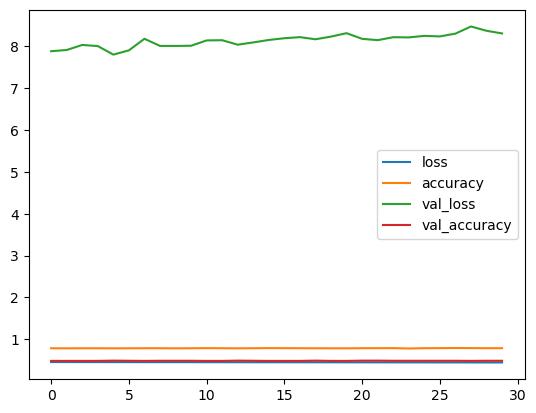

In [86]:
x.plot()

# Q16. Evaluate the model's performance using the test dataset and report relevant metrics.

In [87]:
model.evaluate(X_test,y_test)

10/10 [==============================] - 0s 2ms/step - loss: 8.3072 - accuracy: 0.4875


[8.307210922241211, 0.48750001192092896]

In [94]:
y_pred=model.predict(X_test)

10/10 [==============================] - 0s 2ms/step


In [98]:
y_pred

array([[4.4976085e-01],
       [8.2185441e-09],
       [4.4044565e-14],
       [4.6835776e-04],
       [2.0098343e-01],
       [1.8193241e-07],
       [8.7863195e-01],
       [2.1524413e-09],
       [9.1383145e-06],
       [9.1215082e-02],
       [9.9052936e-01],
       [1.8110963e-24],
       [9.4215763e-01],
       [8.8245881e-04],
       [2.9681180e-05],
       [9.8028064e-01],
       [9.1092455e-01],
       [1.5630235e-09],
       [1.3903965e-13],
       [9.9115312e-01],
       [6.2643139e-08],
       [8.7252766e-01],
       [1.0919081e-19],
       [2.1347243e-14],
       [9.9740928e-01],
       [6.2989226e-21],
       [5.9597351e-02],
       [1.0378574e-16],
       [3.8105115e-25],
       [2.4578120e-14],
       [2.4694288e-17],
       [5.7173407e-22],
       [2.2890053e-15],
       [1.5748534e-12],
       [2.7125869e-05],
       [8.7842979e-02],
       [8.9408922e-01],
       [5.3457613e-11],
       [9.9339581e-01],
       [3.6507934e-08],
       [2.1942876e-09],
       [9.878556

In [133]:
y_pred=y_pred.round().flatten()

In [141]:
y_pred

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1.,
       0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 1., 0., 1.

In [142]:
y_test

array([1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,